/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_29026/1165856703.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data["Close"][-1]


Underlying Asset: AAPL
Current Price (S): $225.00
Annualized Volatility (σ): 22.40%
Alpha (Annualized Return): 17.62%
Beta (Market Sensitivity): 1.00
Strike Price (K): $225.00
Time to Maturity (T): 0.5 years
Risk-Free Rate (r): 3.00%


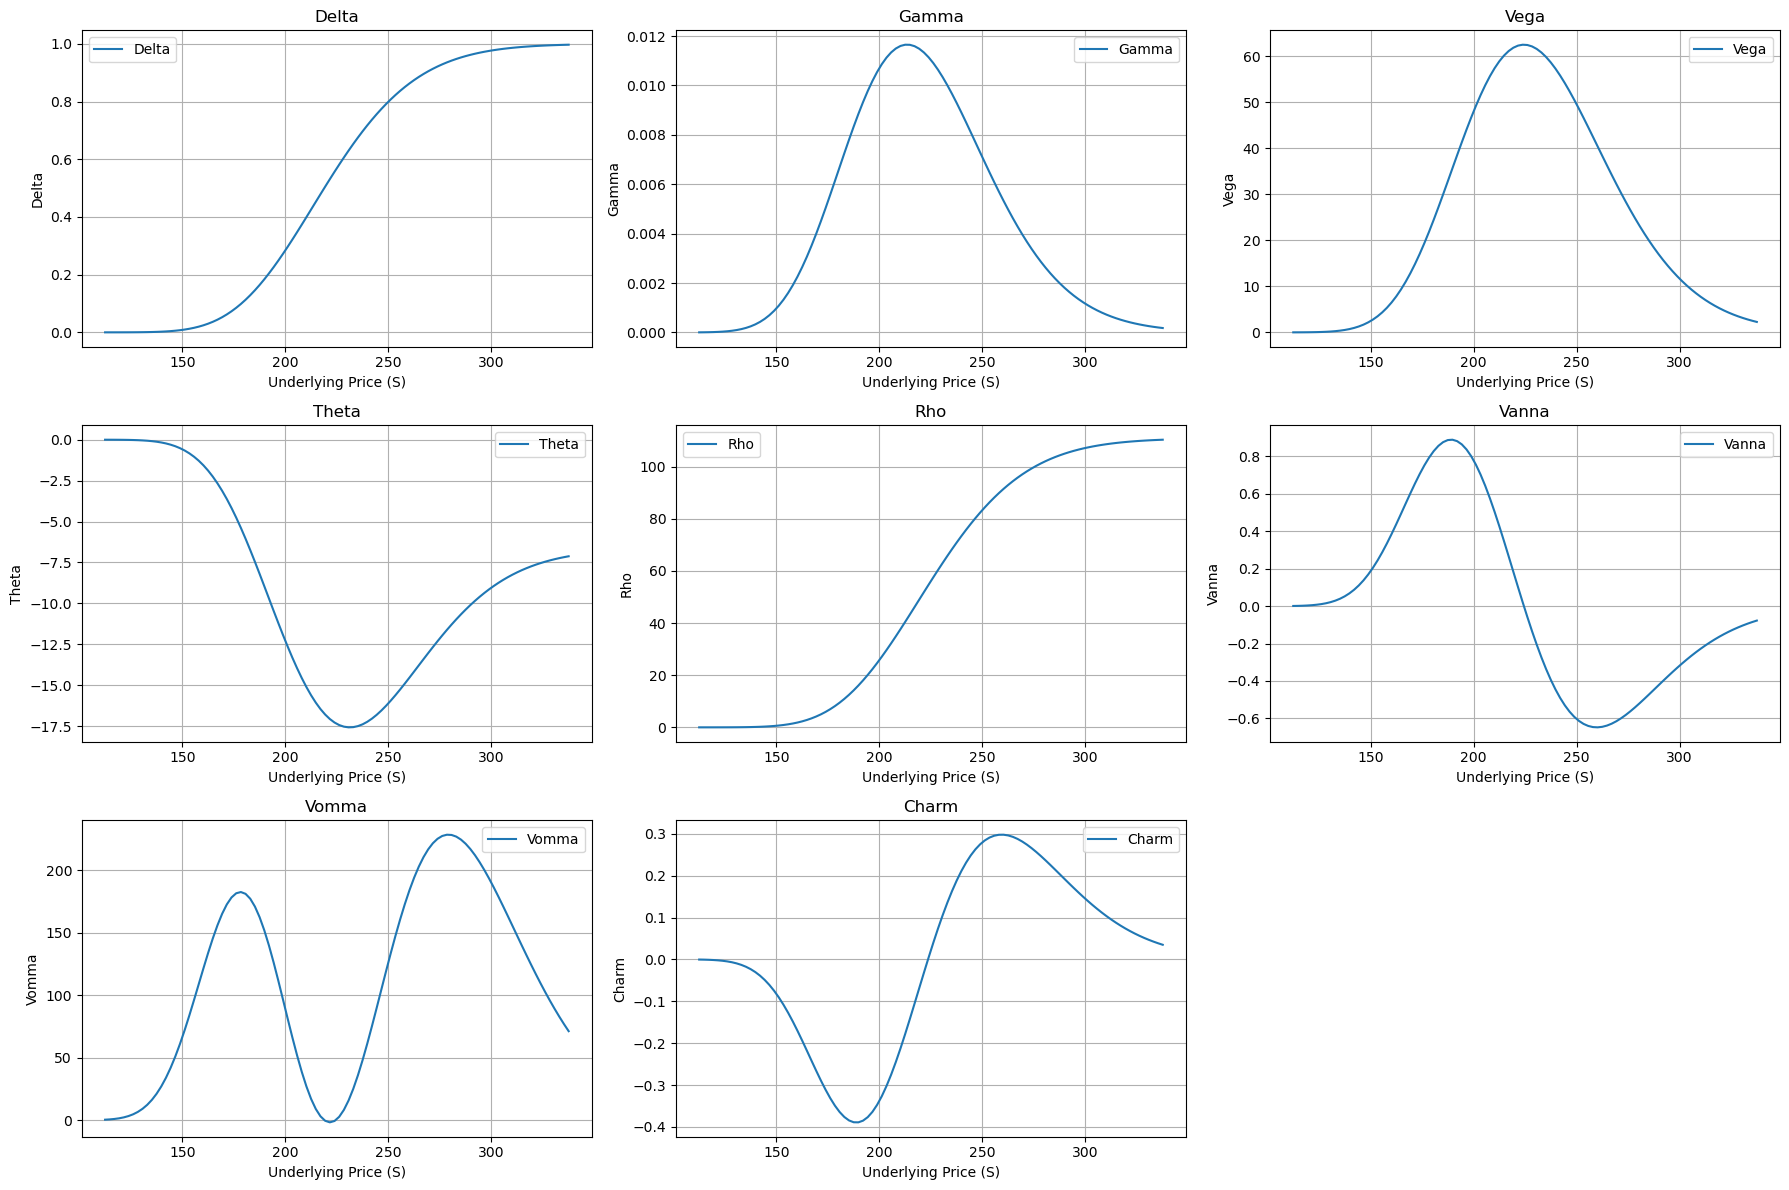

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Black-Scholes Model Functions
def black_scholes_greeks(S, K, T, r, sigma, option_type="call"):
    """Calculate Greeks for a European option using Black-Scholes model."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1) if option_type == "call" else norm.cdf(-d1)
    N_d2 = norm.cdf(d2) if option_type == "call" else norm.cdf(-d2)

    # Primary Greeks
    delta = N_d1 if option_type == "call" else N_d1 - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) -
             r * K * np.exp(-r * T) * N_d2 if option_type == "call" else
             r * K * np.exp(-r * T) * norm.cdf(-d2))
    rho = K * T * np.exp(-r * T) * N_d2 if option_type == "call" else -K * T * np.exp(-r * T) * norm.cdf(-d2)

    # Second-Order Greeks
    vanna = -np.sqrt(T) * norm.pdf(d1) * d2 / sigma
    vomma = vega * (d1 * d2 / sigma)
    charm = -norm.pdf(d1) * (2 * (r - (d1 * sigma / (2 * T))) / (2 * sigma * np.sqrt(T)))

    return {"Delta": delta, "Gamma": gamma, "Vega": vega, "Theta": theta, "Rho": rho,
            "Vanna": vanna, "Vomma": vomma, "Charm": charm}

# Fetch Market Data
def fetch_stock_data(ticker):
    """Fetch historical stock data and calculate financial metrics."""
    stock_data = yf.Ticker(ticker).history(period="1y")
    current_price = stock_data["Close"][-1]
    returns = np.log(stock_data["Close"] / stock_data["Close"].shift(1)).dropna()
    volatility = np.std(returns) * np.sqrt(252)  # Annualized volatility
    beta = np.cov(returns, returns)[0, 1] / np.var(returns)  # Simplified example
    alpha = returns.mean() * 252  # Annualized return
    return current_price, volatility, alpha, beta

# Visualize Greeks
def visualize_greeks(S, K, T, r, sigma, option_type="call"):
    """Visualize Greeks for a European option."""
    prices = np.linspace(S * 0.5, S * 1.5, 100)
    greeks = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Rho", "Vanna", "Vomma", "Charm"]}
    
    for price in prices:
        calculated = black_scholes_greeks(price, K, T, r, sigma, option_type)
        for greek, value in calculated.items():
            greeks[greek].append(value)
    
    # Plotting
    plt.figure(figsize=(18, 12))
    for idx, (greek, values) in enumerate(greeks.items()):
        plt.subplot(3, 3, idx + 1)
        plt.plot(prices, values, label=f"{greek}")
        plt.title(greek)
        plt.xlabel("Underlying Price (S)")
        plt.ylabel(greek)
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    ticker = "AAPL"  # Example stock: Apple Inc.
    S, sigma, alpha, beta = fetch_stock_data(ticker)
    K = S  # At-the-money option
    T = 0.5  # 6 months to maturity
    r = 0.03  # Risk-free rate (3%)
    option_type = "call"

    # Print Details
    print(f"Underlying Asset: {ticker}")
    print(f"Current Price (S): ${S:.2f}")
    print(f"Annualized Volatility (σ): {sigma:.2%}")
    print(f"Alpha (Annualized Return): {alpha:.2%}")
    print(f"Beta (Market Sensitivity): {beta:.2f}")
    print(f"Strike Price (K): ${K:.2f}")
    print(f"Time to Maturity (T): {T} years")
    print(f"Risk-Free Rate (r): {r:.2%}")

    # Visualize Greeks
    visualize_greeks(S, K, T, r, sigma, option_type)


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_29026/977669845.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = data["Close"][-1]


Underlying Asset: Brent Crude Oil (CL=F)
Current Price (S): $67.02
Volatility (σ): 30.00%
Barrier Level: $80.42


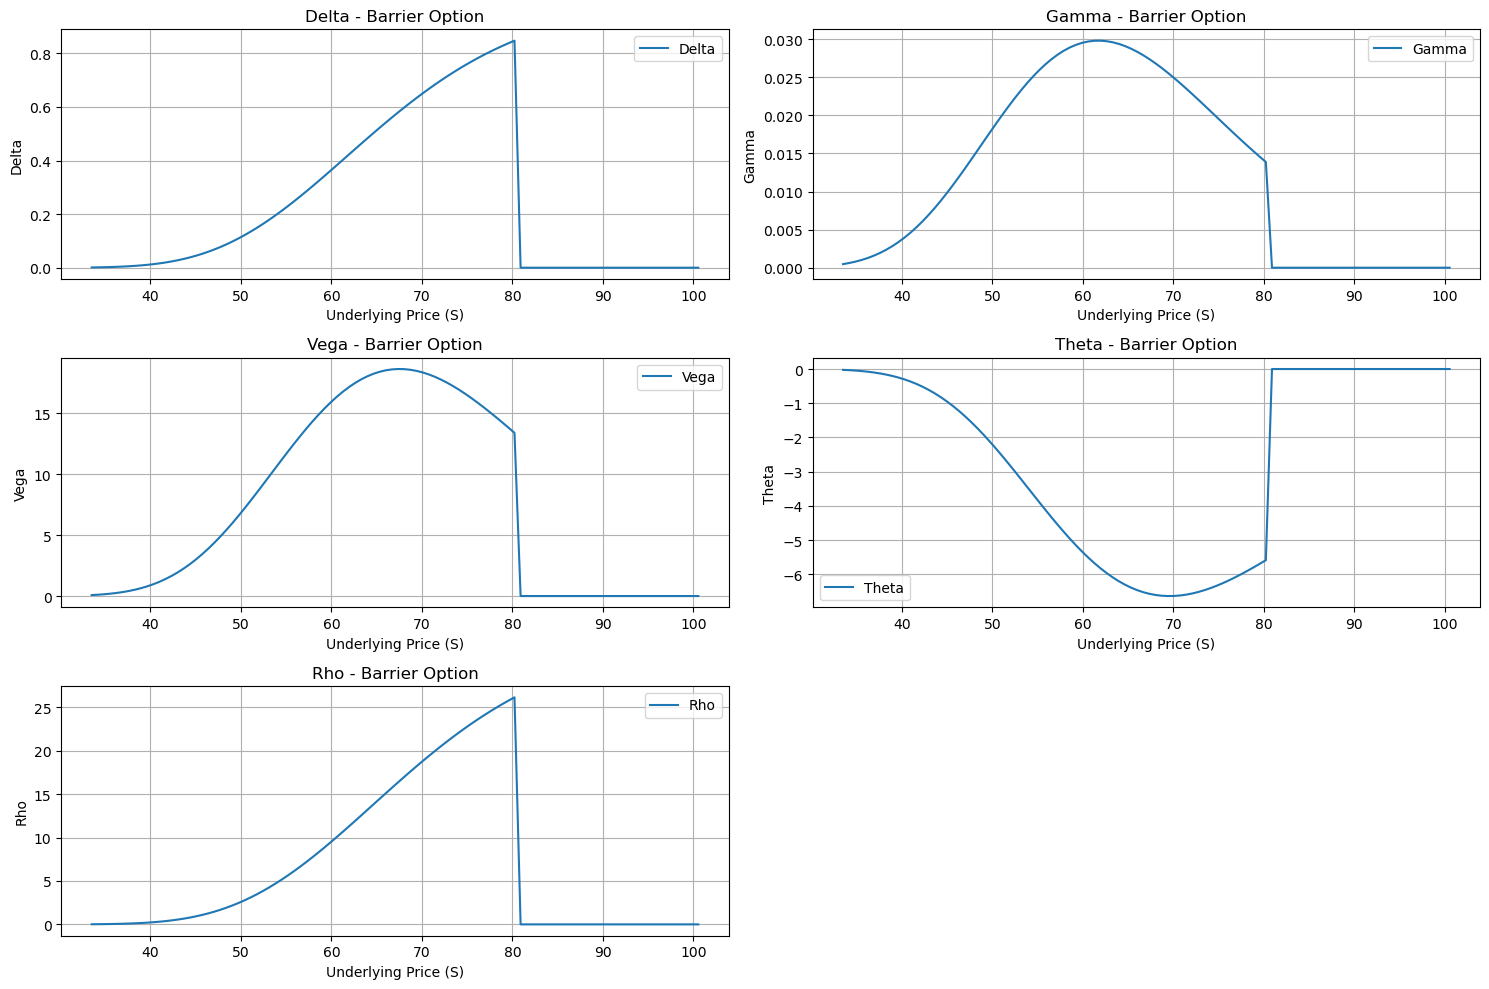

/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_29026/977669845.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = data["Close"][-1]


Underlying Asset: Gold Futures (GC=F)
Current Price (S): $2565.70
Volatility (σ): 14.55%


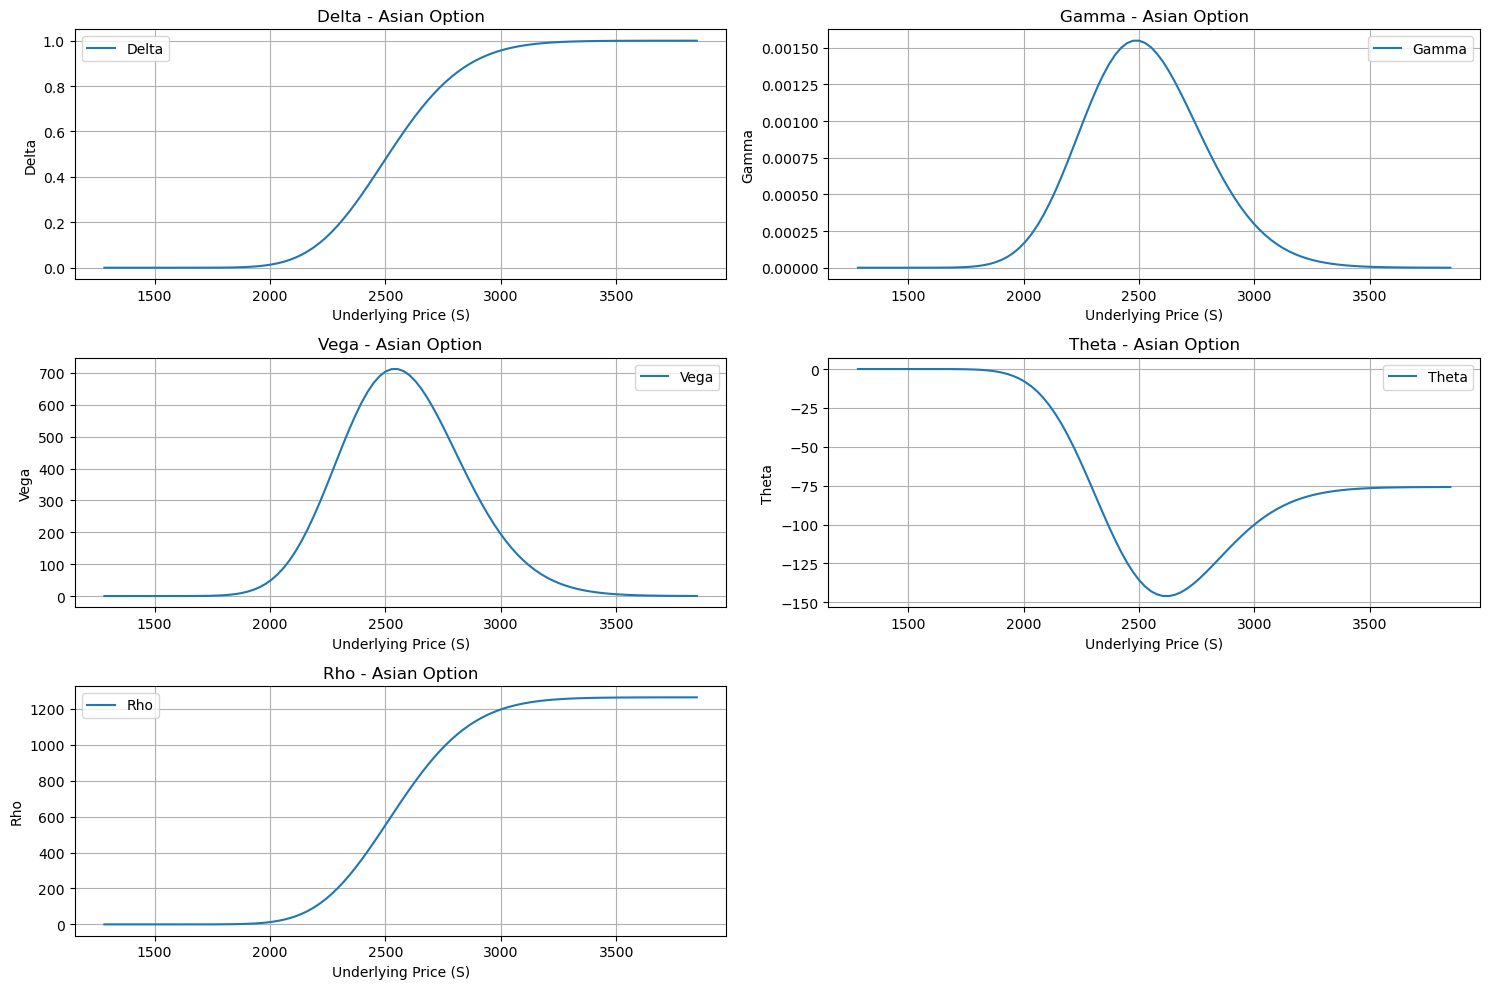

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Define Greeks for Barrier and Asian Options (Simplified for Educational Purposes)
def barrier_option_greeks(S, K, T, r, sigma, barrier, option_type="call", barrier_type="up-and-out"):
    """Calculate Greeks for a simplified Barrier Option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1) if option_type == "call" else norm.cdf(-d1)
    
    # Simplified activation condition
    if (barrier_type == "up-and-out" and S >= barrier) or (barrier_type == "down-and-out" and S <= barrier):
        delta, gamma, vega, theta, rho = 0, 0, 0, 0, 0
    else:
        delta = N_d1 if option_type == "call" else N_d1 - 1
        gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
        vega = S * norm.pdf(d1) * np.sqrt(T)
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) -
                 r * K * np.exp(-r * T) * norm.cdf(d2))
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    
    return {"Delta": delta, "Gamma": gamma, "Vega": vega, "Theta": theta, "Rho": rho}

def asian_option_greeks(S, K, T, r, sigma, option_type="call"):
    """Calculate Greeks for an Asian Option (Simplified)."""
    # Assume the average price is the current price for simplicity
    avg_price = S  # Replace with historical average for real-world scenarios
    d1 = (np.log(avg_price / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1) if option_type == "call" else norm.cdf(-d1)
    
    delta = N_d1 if option_type == "call" else N_d1 - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) -
             r * K * np.exp(-r * T) * norm.cdf(d2))
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    
    return {"Delta": delta, "Gamma": gamma, "Vega": vega, "Theta": theta, "Rho": rho}

# Fetch Market Data
def fetch_data(ticker):
    """Fetch historical data for the underlying asset."""
    data = yf.Ticker(ticker).history(period="1y")
    current_price = data["Close"][-1]
    volatility = np.std(np.log(data["Close"] / data["Close"].shift(1))) * np.sqrt(252)
    return current_price, volatility

# Visualization for Exotic Options
def visualize_exotic_greeks(S, K, T, r, sigma, barrier=None, option_type="call", exotic_type="barrier"):
    """Visualize Greeks for exotic options."""
    prices = np.linspace(S * 0.5, S * 1.5, 100)
    greeks = {key: [] for key in ["Delta", "Gamma", "Vega", "Theta", "Rho"]}
    
    for price in prices:
        if exotic_type == "barrier":
            calculated = barrier_option_greeks(price, K, T, r, sigma, barrier, option_type)
        elif exotic_type == "asian":
            calculated = asian_option_greeks(price, K, T, r, sigma, option_type)
        for greek, value in calculated.items():
            greeks[greek].append(value)
    
    # Plotting
    plt.figure(figsize=(15, 10))
    for idx, (greek, values) in enumerate(greeks.items()):
        plt.subplot(3, 2, idx + 1)
        plt.plot(prices, values, label=f"{greek}")
        plt.title(f"{greek} - {exotic_type.capitalize()} Option")
        plt.xlabel("Underlying Price (S)")
        plt.ylabel(greek)
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Example 1: Barrier Option on Brent Crude
    ticker = "CL=F"  # Brent Crude Oil Futures
    S, sigma = fetch_data(ticker)
    K = S  # ATM strike
    T = 0.5  # 6 months
    r = 0.03  # Risk-free rate
    barrier = S * 1.2  # Example barrier level (20% above current price)
    
    print(f"Underlying Asset: Brent Crude Oil (CL=F)")
    print(f"Current Price (S): ${S:.2f}")
    print(f"Volatility (σ): {sigma:.2%}")
    print(f"Barrier Level: ${barrier:.2f}")
    
    visualize_exotic_greeks(S, K, T, r, sigma, barrier, exotic_type="barrier")

    # Example 2: Asian Option on Gold Prices
    ticker = "GC=F"  # Gold Futures
    S, sigma = fetch_data(ticker)
    K = S  # ATM strike
    
    print(f"Underlying Asset: Gold Futures (GC=F)")
    print(f"Current Price (S): ${S:.2f}")
    print(f"Volatility (σ): {sigma:.2%}")
    
    visualize_exotic_greeks(S, K, T, r, sigma, exotic_type="asian")


Real Life Variations

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

def monte_carlo_barrier(S, K, T, r, sigma, barrier, option_type="call", num_simulations=10000):
    """Monte Carlo simulation for Barrier Option Greeks."""
    dt = T / 365  # Daily steps
    price_paths = np.zeros((num_simulations, 365))
    price_paths[:, 0] = S

    # Generate price paths
    for t in range(1, 365):
        z = np.random.standard_normal(num_simulations)
        price_paths[:, t] = price_paths[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Determine if barrier is breached
    if "up-and-out" in option_type:
        barrier_breached = (price_paths.max(axis=1) >= barrier)
    elif "down-and-out" in option_type:
        barrier_breached = (price_paths.min(axis=1) <= barrier)
    else:
        barrier_breached = np.zeros(num_simulations, dtype=bool)

    # Payoff calculation
    if option_type == "call":
        payoff = np.maximum(price_paths[:, -1] - K, 0) * (~barrier_breached)
    else:
        payoff = np.maximum(K - price_paths[:, -1], 0) * (~barrier_breached)

    # Option price
    option_price = np.exp(-r * T) * np.mean(payoff)

    # Greeks (finite difference method)
    delta = (monte_carlo_barrier(S + 1, K, T, r, sigma, barrier, option_type, num_simulations) -
             monte_carlo_barrier(S - 1, K, T, r, sigma, barrier, option_type, num_simulations)) / 2
    gamma = (monte_carlo_barrier(S + 1, K, T, r, sigma, barrier, option_type, num_simulations) -
             2 * option_price +
             monte_carlo_barrier(S - 1, K, T, r, sigma, barrier, option_type, num_simulations)) / 1
    vega = (monte_carlo_barrier(S, K, T, r, sigma + 0.01, barrier, option_type, num_simulations) -
            monte_carlo_barrier(S, K, T, r, sigma - 0.01, barrier, option_type, num_simulations)) / 0.02

    return {"Option Price": option_price, "Delta": delta, "Gamma": gamma, "Vega": vega}

# Fetch implied volatility
def fetch_iv(ticker, strike, expiry):
    """Fetch implied volatility for the specific strike and expiry (mock example)."""
    # Real-world implementation would use options data providers
    # Placeholder for demo purposes
    return 0.25

# Main Execution
if __name__ == "__main__":
    ticker = "AAPL"
    S, sigma = fetch_data(ticker)
    K = S  # ATM strike
    T = 0.5
    r = 0.03
    barrier = S * 1.2

    # Fetch implied volatility
    sigma = fetch_iv(ticker, K, T)

    # Run Monte Carlo simulation for barrier option
    results = monte_carlo_barrier(S, K, T, r, sigma, barrier, option_type="call")
    print("Monte Carlo Barrier Option Greeks:")
    for key, value in results.items():
        print(f"{key}: {value:.4f}")


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_29026/977669845.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = data["Close"][-1]


RecursionError: maximum recursion depth exceeded in comparison

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo_greeks(S, K, T, r, sigma, barrier=None, option_type="call", exotic_type="barrier", num_simulations=10000):
    """
    Monte Carlo simulation to calculate Greeks for Barrier or Asian options.
    """
    np.random.seed(42)  # For reproducibility
    dt = T / 252  # Daily time steps (252 trading days in a year)
    paths = np.zeros((num_simulations, 252))
    paths[:, 0] = S  # Initialize with the current price

    # Generate price paths
    for t in range(1, 252):
        z = np.random.standard_normal(num_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Determine payoffs based on exotic option type
    if exotic_type == "barrier":
        if "up-and-out" in option_type:
            barrier_breached = np.any(paths >= barrier, axis=1)
        elif "down-and-out" in option_type:
            barrier_breached = np.any(paths <= barrier, axis=1)
        else:
            barrier_breached = np.zeros(num_simulations, dtype=bool)

        if option_type == "call":
            payoffs = np.maximum(paths[:, -1] - K, 0) * (~barrier_breached)
        else:
            payoffs = np.maximum(K - paths[:, -1], 0) * (~barrier_breached)

    elif exotic_type == "asian":
        average_prices = np.mean(paths, axis=1)
        if option_type == "call":
            payoffs = np.maximum(average_prices - K, 0)
        else:
            payoffs = np.maximum(K - average_prices, 0)

    else:
        raise ValueError("Unsupported exotic option type!")

    # Calculate the option price
    option_price = np.exp(-r * T) * np.mean(payoffs)

    # Greeks using finite difference
    delta = (monte_carlo_greeks(S + 1, K, T, r, sigma, barrier, option_type, exotic_type, num_simulations)['Option Price'] -
             monte_carlo_greeks(S - 1, K, T, r, sigma, barrier, option_type, exotic_type, num_simulations)['Option Price']) / 2

    gamma = (monte_carlo_greeks(S + 1, K, T, r, sigma, barrier, option_type, exotic_type, num_simulations)['Option Price'] -
             2 * option_price +
             monte_carlo_greeks(S - 1, K, T, r, sigma, barrier, option_type, exotic_type, num_simulations)['Option Price'])

    vega = (monte_carlo_greeks(S, K, T, r, sigma + 0.01, barrier, option_type, exotic_type, num_simulations)['Option Price'] -
            monte_carlo_greeks(S, K, T, r, sigma - 0.01, barrier, option_type, exotic_type, num_simulations)['Option Price']) / 0.02

    return {"Option Price": option_price, "Delta": delta, "Gamma": gamma, "Vega": vega}

def visualize_greeks(S, K, T, r, sigma, barrier=None, exotic_type="barrier"):
    """
    Visualize Delta, Gamma, and Vega for an exotic option.
    """
    prices = np.linspace(S * 0.8, S * 1.2, 50)
    delta, gamma, vega = [], [], []

    for price in prices:
        greeks = monte_carlo_greeks(price, K, T, r, sigma, barrier, exotic_type=exotic_type, num_simulations=5000)
        delta.append(greeks['Delta'])
        gamma.append(greeks['Gamma'])
        vega.append(greeks['Vega'])

    # Plotting the Greeks
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(prices, delta, label="Delta", color='blue')
    plt.title(f"{exotic_type.capitalize()} Option - Delta")
    plt.xlabel("Underlying Price")
    plt.ylabel("Delta")
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(prices, gamma, label="Gamma", color='green')
    plt.title(f"{exotic_type.capitalize()} Option - Gamma")
    plt.xlabel("Underlying Price")
    plt.ylabel("Gamma")
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(prices, vega, label="Vega", color='red')
    plt.title(f"{exotic_type.capitalize()} Option - Vega")
    plt.xlabel("Underlying Price")
    plt.ylabel("Vega")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Define parameters for a barrier option
    S = 100  # Current stock price
    K = 100  # Strike price
    T = 0.5  # Time to maturity (in years)
    r = 0.03  # Risk-free rate
    sigma = 0.2  # Volatility
    barrier = 120  # Barrier level

    print(f"Analyzing a Barrier Option (Up-and-Out Call):")
    print(f"Underlying Price: {S}, Strike: {K}, Barrier: {barrier}, Volatility: {sigma*100:.1f}%")
    visualize_greeks(S, K, T, r, sigma, barrier, exotic_type="barrier")


Analyzing a Barrier Option (Up-and-Out Call):
Underlying Price: 100, Strike: 100, Barrier: 120, Volatility: 20.0%


: 